## 分析②：EAC × Self-regulation

本分析では，将来予測指標である EAC が，
ユーザーにとって「危機感」として機能し，
行動修正（作業量の増加）を引き起こしたかを検証する。

具体的には，
EAC が締切超過と予測された日（EAC超過イベント）を基準に，
その前後で作業量がどのように変化したかを分析する。


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving eac_events.csv to eac_events (1).csv


In [ ]:
df = pd.read_csv("eac_events.csv")
df

,userId,todoId,eventDateKey,deadlineKey,estimatedMinutes,eacDateKey_at_event,minutes_before_7d_avg,minutes_after_7d_avg,delta_minutes_7d,pace7d_at_event,spi_at_event,hasPlan_at_event,planContainsThisTodo_at_event,notes
0,DgApBqtxpeVE5G5MnIVw9ThpyN93,GcE0Hifqb7GEKHs4nCEl,2025-11-25,2025-11-27,90,2025-11-28,3.285714,0.000000,-3.285714,23.000000,1.03,False,False,NaN
1,DgApBqtxpeVE5G5MnIVw9ThpyN93,aQInLuXM80dQeHCpz6vs,2025-11-29,2025-12-01,720,2025-12-02,42.857143,60.000000,17.142857,150.000000,1.07,False,False,NaN
2,DgApBqtxpeVE5G5MnIVw9ThpyN93,qqno5R8Kz2aCKyUhqk3A,2025-11-26,2025-11-27,90,2025-11-28,5.857143,0.000000,-5.857143,41.000000,1.67,False,False,NaN
3,DgApBqtxpeVE5G5MnIVw9ThpyN93,yFII5G1f8Yf47CTrPlWC,2025-11-26,2025-12-31,6000,2026-02-07,42.857143,12.857143,-30.000000,55.714286,0.50,False,False,NaN


In [ ]:
len(df)

4

In [ ]:
df[[
    "minutes_before_7d_avg",
    "minutes_after_7d_avg",
    "delta_minutes_7d"
]]

,minutes_before_7d_avg,minutes_after_7d_avg,delta_minutes_7d
0,3.285714,0.000000,-3.285714
1,42.857143,60.000000,17.142857
2,5.857143,0.000000,-5.857143
3,42.857143,12.857143,-30.000000


/tmp/ipython-input-632281189.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


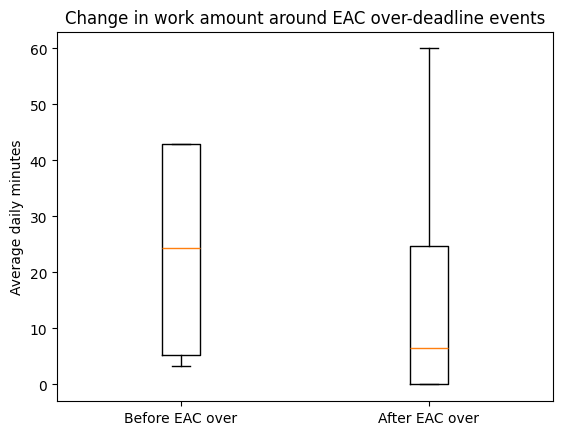

In [ ]:
plt.boxplot(
    [df["minutes_before_7d_avg"], df["minutes_after_7d_avg"]],
    labels=["Before EAC over", "After EAC over"]
)
plt.ylabel("Average daily minutes")
plt.title("Change in work amount around EAC over-deadline events")
plt.show()

In [ ]:
stats.shapiro(df["delta_minutes_7d"])

ShapiroResult(statistic=np.float64(0.9639113492189824), pvalue=np.float64(0.8034935812625393))

In [ ]:
stats.wilcoxon(
    df["minutes_before_7d_avg"],
    df["minutes_after_7d_avg"]
)

WilcoxonResult(statistic=np.float64(3.0), pvalue=np.float64(0.625))

In [ ]:
df[["minutes_before_7d_avg", "minutes_after_7d_avg"]].mean()

,0
minutes_before_7d_avg,23.714286
minutes_after_7d_avg,18.214286


In [ ]:
(df["delta_minutes_7d"] > 0).mean()

np.float64(0.25)